項目データの生成

In [1]:
import numpy as np 
import pandas as pd
import os
from functools import partial
import matplotlib.pyplot as plt

In [2]:
def func_classify(x):
  if x < -1.29:
    return 1
  elif x >= -1.29 and x < -0.81:
    return 2 
  elif x >= -0.81 and x < -0.49:
    return 3 
  elif x >= -0.49 and x < -0.23:
    return 4 
  elif x >= -0.23 and x < 0:
    return 5 
  elif x >= -0 and x < 0.23:
    return 6
  elif x >= 0.23 and x < 0.49:
    return 7
  elif x >= 0.49 and x < 0.81:
    return 8
  elif x >= 0.81 and x < 1.29:
    return 9
  else:
    return 10 

In [3]:
D = 1.7
#2PL model
def L2P(a,b,x):
    return 1 / (1 + np.exp( -D*a*(x - b)))

In [4]:

def gen_irdata(num_items,num_users,seed):
  #数値計算で発散させないためのε
  epsion = 0.00001
  #model parameterの定義
  #aは0.5から2.0
  #bは-1.5から1.5
  #cは0以上1未満
  a_min = 0.5
  a_max = 2.0
  b_min = -1.5
  b_max = 1.5
  #問題parameterの生成
  np.random.seed(seed=seed)
  item_params = np.array(
      [np.random.uniform(a_min, a_max, num_items),
      np.random.uniform(b_min, b_max, num_items),
      ]
  ).T
  #受験者parameterの生成
  user_params = np.random.normal(size = num_users)

  #項目反応行列の作成、要素は0(誤答)、1(正答)
  #i行j列は問題iに対して受験者jがどう反応したか
  ir_matrix_ij = np.vectorize(int)(
      np.array(
          [partial(L2P, *ip)(user_params) > np.random.uniform(0, 1, num_users) for ip in item_params]))
  ir_mat_ij = ir_matrix_ij.T
  return ir_mat_ij,user_params,item_params

In [5]:
def to_Y(ir_mat_ij):
    score = np.sum(ir_mat_ij,axis = 1)
    index = np.argsort(score)
    #print('スコア',score,'index',index)
    T = 10
    I,J = np.shape(ir_mat_ij)
    k = int(I/T)
    Y = np.zeros((I,T))
    for t in range(T):
        for j in range(k*t,k*(t+1)):
            i = index[j]
            Y[i,t] = int(1) 
    return Y

In [6]:
#問題数の設定
num_items = 10
num_users = 3000
seed = 0
U,user_params,item_params = gen_irdata(num_items,num_users,seed)
Y = to_Y(U)

In [7]:
user = pd.DataFrame(user_params,columns=['theta'])
T_true = user['theta'].apply(func_classify)
T_true = T_true.values
T_true


array([10,  5,  7, ...,  1,  1,  6])

In [8]:
U_list = []
for i in range(len(U)):
    for j in range((len(U[0]))):
         U_list.append((i + 1, j + 1, U[i, j]))
U_list


[(1, 1, 1),
 (1, 2, 1),
 (1, 3, 1),
 (1, 4, 1),
 (1, 5, 1),
 (1, 6, 1),
 (1, 7, 1),
 (1, 8, 0),
 (1, 9, 1),
 (1, 10, 1),
 (2, 1, 1),
 (2, 2, 0),
 (2, 3, 1),
 (2, 4, 0),
 (2, 5, 0),
 (2, 6, 1),
 (2, 7, 1),
 (2, 8, 0),
 (2, 9, 0),
 (2, 10, 1),
 (3, 1, 1),
 (3, 2, 0),
 (3, 3, 1),
 (3, 4, 0),
 (3, 5, 1),
 (3, 6, 1),
 (3, 7, 1),
 (3, 8, 0),
 (3, 9, 0),
 (3, 10, 0),
 (4, 1, 0),
 (4, 2, 1),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 1),
 (4, 6, 1),
 (4, 7, 1),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (5, 1, 0),
 (5, 2, 0),
 (5, 3, 0),
 (5, 4, 0),
 (5, 5, 0),
 (5, 6, 0),
 (5, 7, 0),
 (5, 8, 0),
 (5, 9, 0),
 (5, 10, 0),
 (6, 1, 0),
 (6, 2, 1),
 (6, 3, 0),
 (6, 4, 0),
 (6, 5, 1),
 (6, 6, 1),
 (6, 7, 1),
 (6, 8, 0),
 (6, 9, 0),
 (6, 10, 1),
 (7, 1, 0),
 (7, 2, 1),
 (7, 3, 1),
 (7, 4, 1),
 (7, 5, 1),
 (7, 6, 1),
 (7, 7, 1),
 (7, 8, 0),
 (7, 9, 0),
 (7, 10, 1),
 (8, 1, 0),
 (8, 2, 0),
 (8, 3, 0),
 (8, 4, 0),
 (8, 5, 1),
 (8, 6, 1),
 (8, 7, 0),
 (8, 8, 0),
 (8, 9, 0),
 (8, 10, 0),
 (9, 1, 1),
 (9, 2, 1),
 (9, 3, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


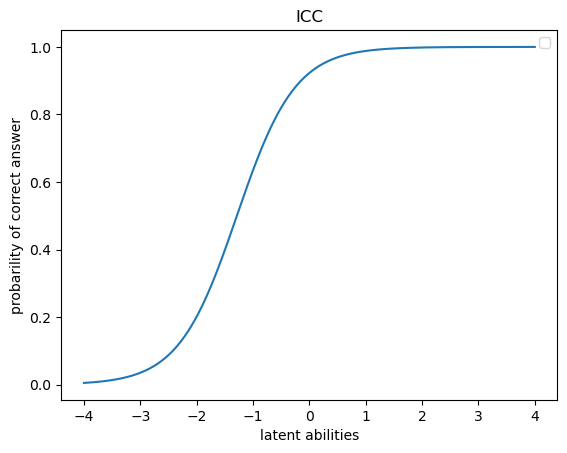

In [9]:
x=np.linspace(-4,4,1000)
for i in range(4,5):
  a,b = item_params[i,:]
  y = L2P(a,b,x)
  plt.plot(x,y)
plt.title('ICC')
plt.xlabel("latent abilities")
plt.ylabel("probarility of correct answer")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


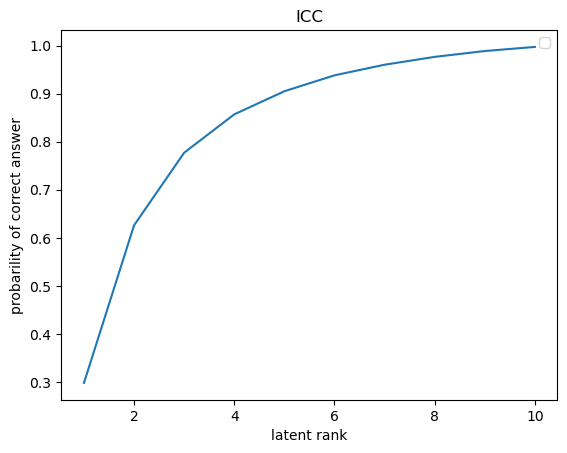

In [10]:
I = [-1.73,-1.02,-0.64,-0.36,-0.12,0.12,0.36,0.64,1.02,1.73] 
x=[1,2,3,4,5,6,7,8,9,10]
for k in range(4,5):
  a,b = item_params[k,:]
  y = L2P(a,b,I)
  label=k+1
  plt.plot(x,y,)
plt.title('ICC')
plt.xlabel("latent rank")
plt.ylabel("probarility of correct answer")
plt.legend()
plt.show()

In [11]:
path = f"/Users/shukitakeuchi/Library/Mobile Documents/com~apple~CloudDocs/研究/項目反応理論/data{seed}/"
data_list = {"U":U,"Y":Y,"T_true":T_true,"U_list":U_list,"item_params":item_params,"user_params":user_params}

output_path = os.path.join(path,f"{num_items}*{num_users}")
os.makedirs(output_path)
for data_name,data in data_list.items():
    output =  os.path.join(output_path,f"irtdata_{data_name}.csv")
    np.savetxt(output, data, delimiter=",", fmt="%.5f")

FileExistsError: [Errno 17] File exists: '/Users/shukitakeuchi/Library/Mobile Documents/com~apple~CloudDocs/研究/項目反応理論/data0/10*3000'

ここまで